In [35]:
import csv
import pandas as pd
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community 

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [15]:
subset_left = 'LEFT'
subset_right = 'RIGHT'

In [33]:
nodes_df_L   = pd.read_csv('NODES_sinistra_hate_subset.csv', low_memory=False)
edges_df_L   = pd.read_csv('EDGES_sinistra_adjacent.csv', low_memory=False)

In [34]:
nodes_df_R   = pd.read_csv('NODES_destra_hate_subset.csv', low_memory=False)
edges_df_R   = pd.read_csv('EDGES_destra_adjacent.csv', low_memory=False)

In [58]:
def extract_communities(nodes_df, edges_df, subset, size_word=None ):
  #Create Network Graph
  G = nx.from_pandas_edgelist(edges_df, 'source', 'target', ['weight'])
  data = nodes_df.set_index('id').to_dict('index').items()
  print(nx.info(G)) # Print information about the Graph
  G.add_nodes_from(data)

  ############## Community Algorithm (I guess it's Louvain's algo )#####################

  communities = community.greedy_modularity_communities(G)
  modularity_dict = {} # Create a blank dictionary
  for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
      for name in c: # Loop through each word
          modularity_dict[name] = i 

  # Now you can add modularity information like we did the other metrics
  nx.set_node_attributes(G, modularity_dict, 'modularity')
  communities = sorted(communities, key=len, reverse=True)
  #Save new networkX Graph with modularity attribute
  nx.write_gpickle(G, str(subset)+'_communities_graph.gpickle')
  print(f"The graph has {len(communities)} communities.")

  ######### Extract Degree of each word in each community ##############

  nodes_class = [v.get('label') for n,v in G.nodes(data=True) if v['modularity'] == 0]  
  #Extract Degree Dictionary necessary for word cloud 
  degree_dict = dict(G.degree(G.nodes()))
  nx.set_node_attributes(G, degree_dict, 'degree')
  sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
  labels_dict   = nx.get_node_attributes(G,'label')

  ########## Create Word Cloud Dictionary ###############################
  # For each community we have dict --> Word: Degree
  #Appending labels to classes instead of IDs

  #size node by degree
  if size_word == 'degree':
    classes_dict = {}
    word_cloud_dict = {}
    for i,c in enumerate(communities):
          nodes_class = [( v.get('label'), v.get('degree') ) for n,v in G.nodes(data=True) if v['modularity'] == i ]  
          classes_dict[i] = nodes_class
          word_cloud_dict[i] = dict(classes_dict[i]) 

  #size node by problematic index
  elif size_word == 'problematic_index':
    classes_dict = {}
    word_cloud_dict = {}
    for i,c in enumerate(communities):
          nodes_class = [( v.get('label'), v.get('counts_prob') ) for n,v in G.nodes(data=True) if v['modularity'] == i and v.get('counts_prob') !=0]  
          classes_dict[i] = nodes_class
          word_cloud_dict[i] = dict(classes_dict[i]) 

  return word_cloud_dict

def get_community(word_dict, index):
  community = word_dict[index]
  return community

In [59]:
#Extract Right Parties community
word_cloud_right = extract_communities(nodes_df_R, edges_df_R, subset_right, size_word = 'degree')

Name: 
Type: Graph
Number of nodes: 9774
Number of edges: 48546
Average degree:   9.9337
The graph has 511 communities.


In [38]:
#Extract Left Parties communities
word_cloud_left = extract_communities(nodes_df_L, edges_df_L, subset_left, size_word = 'degree')

Name: 
Type: Graph
Number of nodes: 13492
Number of edges: 79062
Average degree:  11.7198
The graph has 548 communities.


In [60]:
#Plotting a selected community 
def plot_clusters(community):
  print('plot of the community...')
  wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white',  
                min_font_size = 10).generate_from_frequencies(community)
  plt.figure()
  plt.imshow(wordcloud,interpolation="bilinear")
  plt.axis("off")
  plt.show()

# RIGHT PARTIES PLOTS

Biggest community right parties

plot of the community...


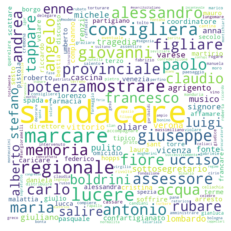

In [61]:
#getting 1st biggest community in the right parties
community_right = get_community(word_cloud_right, 1) #change this index
plot_clusters(community_right)

10th biggest community in Right Parties Network


plot of the community...


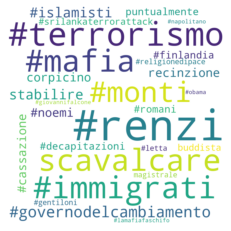

In [62]:
#getting 10th biggest community in the right parties
community_right = get_community(word_cloud_right, 10) #change this index
plot_clusters(community_right)
#seems like the topic is terrorism, immigrants..

#LEFT PARTIES PLOTS

Biggest Community Left Parties

plot of the community...


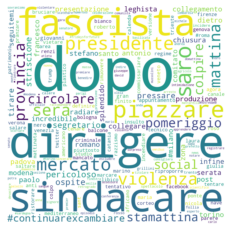

In [43]:
#getting 1st biggest community in the left parties
community_left = get_community(word_cloud_left, 1) #change this index
plot_clusters(community_left)

10th biggest community in left parties network


plot of the community...


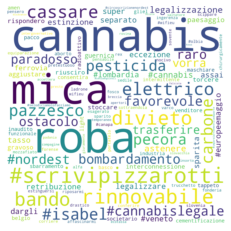

In [41]:
#getting 10th biggest community in teh left parties
community_left = get_community(word_cloud_left, 10) #change this index
plot_clusters(community_left)

In [53]:
#Extract Right Parties communities
word_cloud_right_prob = extract_communities(nodes_df_R, edges_df_R, subset_right, size_word='problematic_index')

Name: 
Type: Graph
Number of nodes: 9774
Number of edges: 48546
Average degree:   9.9337
The graph has 511 communities.


plot of the community...


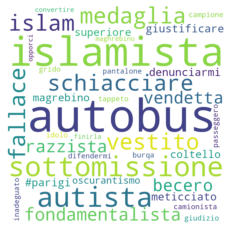

In [56]:
community_right = get_community(word_cloud_right_prob, 2) #change this index
plot_clusters(community_right)